In [290]:
import pickle
import numpy as np
import numpy.matlib as mt
from matplotlib import pyplot as plt
from scipy import signal,stats
import os 
import glob

In [25]:
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/ROCanalyses/LIPsampleROC', 'rb') as handle:
    lip = pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/ROCanalyses/PFCsampleROC', 'rb') as handle:
    pfc = pickle.load(handle)    

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/ROCanalyses/V4sampleROC', 'rb') as handle:
    v4 = pickle.load(handle)        

In [26]:
def definelatencies(p_values, win, threshold):

   lat=[]

   for i in np.arange(p_values.shape[0]):
      
      tmp=[]
      
      sig=np.zeros(p_values.shape[1])
      sig[np.where(p_values[i,:]<0.01)]=1
      

      for i_step in np.arange(sig.shape[0]):
         if sig[i_step]==1 and np.sum(sig[i_step:i_step+win])>=threshold:
            tmp.append(i_step)  

      if not tmp:
         lat.append(np.nan)  
      else:
         lat.append(tmp[0])  
      
   lat=np.array(lat)

   return lat


In [272]:
def sortrocvaluesbylatencies(values,lat):
    
    sig_cells       =   np.where(lat>=0)[0]
    nonsig_cells    =   np.where(np.isnan(lat))[0]

    pos_sig_cells=sig_cells[np.mean(values[sig_cells,:], axis=1)>=0]
    neg_sig_cells=sig_cells[np.mean(values[sig_cells,:], axis=1)<0]

    sortpos_sig=np.argsort(lat[pos_sig_cells])
    sortneg_sig=np.argsort(lat[neg_sig_cells])
    sorted_index=np.concatenate([neg_sig_cells[sortneg_sig], nonsig_cells, pos_sig_cells[sortpos_sig[::-1]]])
    return sorted_index
               

In [291]:
directory_b1    =   "W:/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/"
bhv_directory   =   os.path.normpath(str(directory_b1) +  "/bhv/")

area="pfc"
neurons_pfc_directory =   os.path.normpath(str(directory_b1) + area + "/neurons/*.h5")
neurons_pfc_files     =   glob.glob(neurons_pfc_directory, recursive=True)

area="v4"
neurons_v4_directory =   os.path.normpath(str(directory_b1) + area + "/neurons/*.h5")
neurons_v4_files     =   glob.glob(neurons_v4_directory, recursive=True)

area="lip"

neurons_lip_directory =   os.path.normpath(str(directory_b1) + area + "/neurons/*.h5")
neurons_lip_files     =   glob.glob(neurons_lip_directory, recursive=True)

In [303]:
neurons_lip_files[np.where(lat_lip_neutral<350)[0][4]]

'W:\\invibe\\USERS\\IBOS\\data\\Riesling\\TSCM\\OpenEphys\\new_structure\\session_struct\\lip\\neurons\\2023-03-16_10-20-01_Riesling_lip_e1_r1_good1_neu.h5'

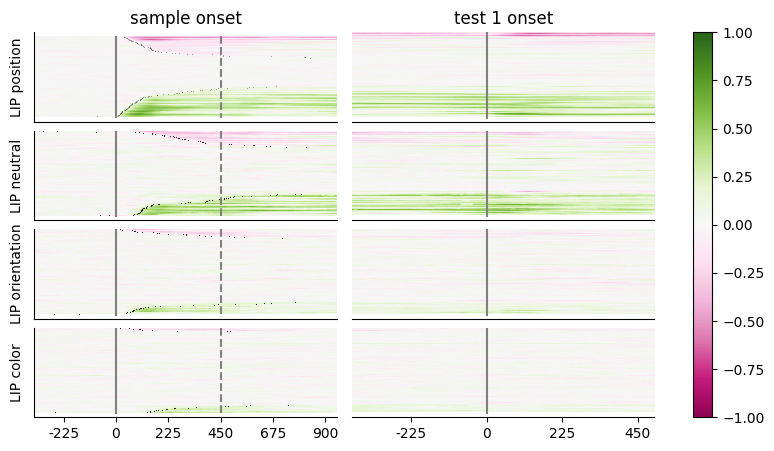

In [282]:
lip_neutral_sample_value    =   lip[0][1]
lip_neutral_test_value      =   lip[2][1]

lip_orient_sample_value     =   lip[0][3]
lip_orient_test_value       =   lip[2][3]

lip_color_sample_value      =   lip[0][5]
lip_color_test_value        =   lip[2][5]

lip_position_sample_value   =   lip[0][7]
lip_position_test_value     =   lip[2][7]


lat_lip_neutral     =   lip[4][1]
lat_lip_orient      =   lip[4][3]
lat_lip_color       =   lip[4][5]
lat_lip_position    =   lip[4][7]

lat_lip_position[lat_lip_position>1200]=np.nan
lat_lip_neutral[lat_lip_neutral>1200]=np.nan
lat_lip_orient[lat_lip_orient>1200]=np.nan
lat_lip_color[lat_lip_color>1200]=np.nan

sort_sneutral    =   sortrocvaluesbylatencies(lip_neutral_sample_value[:,450:900],lat_lip_neutral)
sort_sorient     =   sortrocvaluesbylatencies(lip_orient_sample_value[:,450:900],lat_lip_orient)
sort_scolor      =   sortrocvaluesbylatencies(lip_color_sample_value[:,450:900],lat_lip_color)
sort_sposition   =   sortrocvaluesbylatencies(lip_position_sample_value[:,450:900],lat_lip_position)

sort_tneutral    =   np.argsort(np.mean(lip_neutral_test_value[:,450:900], axis=1))
sort_torient     =   np.argsort(np.mean(lip_orient_test_value[:,450:900], axis=1))
sort_tcolor      =   np.argsort(np.mean(lip_color_test_value[:,450:900], axis=1))
sort_tposition   =   np.argsort(np.mean(lip_position_test_value[:,450:900], axis=1))

sort_neutral    =   sort_sneutral
sort_orient     =   sort_sorient
sort_color      =   sort_scolor
sort_position   =   sort_sposition


# fig     =   plt.figure(figsize=(10,10))
fig, ax      =   plt.subplots(4,2,figsize=(10,5))

# im0       =   sns.heatmap(lip_position_sample_value[sort_position,:1300], vmin=-1, vmax=1, cmap='PiYG', ax=ax[0,0])#
im0       =   ax[0,0].imshow(lip_position_sample_value[sort_position,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto', interpolation='bilinear')
im1       =   ax[0,1].imshow(lip_position_test_value[sort_position,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im2       =   ax[1,0].imshow(lip_neutral_sample_value[sort_neutral,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im3       =   ax[1,1].imshow(lip_neutral_test_value[sort_neutral,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im4       =   ax[2,0].imshow(lip_orient_sample_value[sort_orient,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im5       =   ax[2,1].imshow(lip_orient_test_value[sort_orient,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im6       =   ax[3,0].imshow(lip_color_sample_value[sort_color,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im7       =   ax[3,1].imshow(lip_color_test_value[sort_color,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

ax[0,0].scatter(lat_lip_position[sort_position], np.arange(lat_lip_position.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,0].scatter(lat_lip_neutral[sort_neutral], np.arange(lat_lip_neutral.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.5)
ax[2,0].scatter(lat_lip_orient[sort_orient], np.arange(lat_lip_orient.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=.5)
ax[3,0].scatter(lat_lip_color[sort_color], np.arange(lat_lip_color.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=.5)

# ax[0,0].plot([lat_lip_position[sort_position], lat_lip_position[sort_position]], [np.arange(lat_lip_position.shape[0])-.5, np.arange(lat_lip_position.shape[0])+0.5], color=[0, 0, 0], linewidth=1)
# ax[1,0].plot([lat_lip_neutral[sort_neutral], lat_lip_neutral[sort_neutral]], [np.arange(lat_lip_neutral.shape[0])-.5, np.arange(lat_lip_neutral.shape[0])+.5], color=[0, 0, 0], linewidth=1)
# ax[2,0].plot([lat_lip_orient[sort_orient], lat_lip_orient[sort_orient]], [np.arange(lat_lip_orient.shape[0])-.5, np.arange(lat_lip_orient.shape[0])+.5], color=[0, 0, 0], linewidth=1)
# ax[3,0].plot([lat_lip_color[sort_color], lat_lip_color[sort_color]], [np.arange(lat_lip_color.shape[0])-.5, np.arange(lat_lip_color.shape[0])+.5], color=[0, 0, 0], linewidth=1)

ax[0,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[1,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[2,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[3,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))

ax[0,0].plot([350+450,350+450],[-1, sort_neutral.shape[0]+2],color=(0.5, .5, .5),linestyle='dashed')
ax[1,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5),linestyle='dashed')
ax[2,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5), linestyle='dashed')
ax[3,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5), linestyle='dashed')

ax[0,1].plot([400,400],[2, sort_neutral.shape[0]+2],color=(0.5, .5, .5))
ax[1,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))
ax[2,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))
ax[3,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_title('sample onset')
ax[0,0].set_ylabel('LIP position')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_title('test 1 onset')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[1,0].set_ylabel('LIP neutral')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[2,0].set_xticks([])
ax[2,0].set_yticks([])
ax[2,0].set_ylabel('LIP orientation')
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)

ax[2,1].set_xticks([])
ax[2,1].set_yticks([])
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].spines['left'].set_visible(False)

ax[3,0].set_xticks([350+225*(-1), 350+225*(0), 350+225*(1), 350+225*(2), 350+225*(3), 350+225*(4)])
ax[3,0].set_xticklabels(['-225', '0', '225', '450', '675', '900'])
ax[3,0].set_yticks([])
ax[3,0].set_ylabel('LIP color')
ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)

ax[3,1].set_xticks([400+225*(-1), 400+225*(0), 400+225*(1), 400+225*(2)])
ax[3,1].set_xticklabels(['-225', '0', '225', '450'])
ax[3,1].set_yticks([])
ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)
ax[3,1].spines['left'].set_visible(False)

fig.subplots_adjust(wspace=0.05, hspace=0.1)
fig.colorbar(im2, ax=ax)

plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/ROC_lip.pdf')  

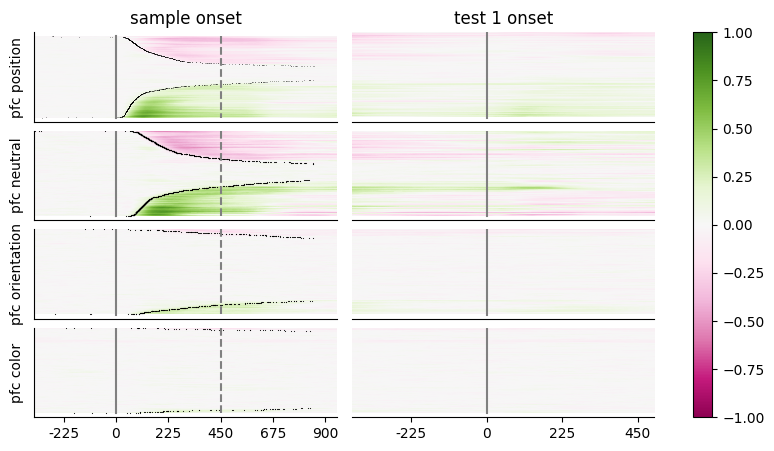

In [283]:
pfc_neutral_sample_value    =   pfc[0][1]
pfc_neutral_test_value      =   pfc[2][1]

pfc_orient_sample_value     =   pfc[0][3]
pfc_orient_test_value       =   pfc[2][3]

pfc_color_sample_value      =   pfc[0][5]
pfc_color_test_value        =   pfc[2][5]

pfc_position_sample_value   =   pfc[0][7]
pfc_position_test_value     =   pfc[2][7]

lat_pfc_neutral     =   pfc[4][1]
lat_pfc_orient      =   pfc[4][3]
lat_pfc_color       =   pfc[4][5]
lat_pfc_position    =   pfc[4][7]

lat_pfc_position[lat_pfc_position>1200]=np.nan
lat_pfc_neutral[lat_pfc_neutral>1200]=np.nan
lat_pfc_orient[lat_pfc_orient>1200]=np.nan
lat_pfc_color[lat_pfc_color>1200]=np.nan

sort_sneutral    =   sortrocvaluesbylatencies(pfc_neutral_sample_value[:,450:900],lat_pfc_neutral)
sort_sorient     =   sortrocvaluesbylatencies(pfc_orient_sample_value[:,450:900],lat_pfc_orient)
sort_scolor      =   sortrocvaluesbylatencies(pfc_color_sample_value[:,450:900],lat_pfc_color)
sort_sposition   =   sortrocvaluesbylatencies(pfc_position_sample_value[:,450:900],lat_pfc_position)

sort_tneutral    =   np.argsort(np.mean(pfc_neutral_test_value[:,450:900], axis=1))
sort_torient     =   np.argsort(np.mean(pfc_orient_test_value[:,450:900], axis=1))
sort_tcolor      =   np.argsort(np.mean(pfc_color_test_value[:,450:900], axis=1))
sort_tposition   =   np.argsort(np.mean(pfc_position_test_value[:,450:900], axis=1))

sort_neutral    =   sort_sneutral
sort_orient     =   sort_sorient
sort_color      =   sort_scolor
sort_position   =   sort_sposition


# fig     =   plt.figure(figsize=(10,10))
fig, ax      =   plt.subplots(4,2,figsize=(10,5))

# im0       =   sns.heatmap(pfc_position_sample_value[sort_position,:1300], vmin=-1, vmax=1, cmap='PiYG', ax=ax[0,0])#
im0       =   ax[0,0].imshow(pfc_position_sample_value[sort_position,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto', interpolation='bilinear')
im1       =   ax[0,1].imshow(pfc_position_test_value[sort_position,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im2       =   ax[1,0].imshow(pfc_neutral_sample_value[sort_neutral,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im3       =   ax[1,1].imshow(pfc_neutral_test_value[sort_neutral,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im4       =   ax[2,0].imshow(pfc_orient_sample_value[sort_orient,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im5       =   ax[2,1].imshow(pfc_orient_test_value[sort_orient,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im6       =   ax[3,0].imshow(pfc_color_sample_value[sort_color,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im7       =   ax[3,1].imshow(pfc_color_test_value[sort_color,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

ax[0,0].scatter(lat_pfc_position[sort_position], np.arange(lat_pfc_position.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,0].scatter(lat_pfc_neutral[sort_neutral], np.arange(lat_pfc_neutral.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.5)
ax[2,0].scatter(lat_pfc_orient[sort_orient], np.arange(lat_pfc_orient.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=.5)
ax[3,0].scatter(lat_pfc_color[sort_color], np.arange(lat_pfc_color.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=.5)

# ax[0,0].plot([lat_pfc_position[sort_position], lat_pfc_position[sort_position]], [np.arange(lat_pfc_position.shape[0])-.5, np.arange(lat_pfc_position.shape[0])+0.5], color=[0, 0, 0], linewidth=1)
# # ax[1,0].plot([lat_pfc_neutral[sort_neutral], lat_pfc_neutral[sort_neutral]], [np.arange(lat_pfc_neutral.shape[0])-.5, np.arange(lat_pfc_neutral.shape[0])+.5], color=[0, 0, 0], linewidth=1)
# ax[2,0].plot([lat_pfc_orient[sort_orient], lat_pfc_orient[sort_orient]], [np.arange(lat_pfc_orient.shape[0])-.5, np.arange(lat_pfc_orient.shape[0])+.5], color=[0, 0, 0], linewidth=1)
# ax[3,0].plot([lat_pfc_color[sort_color], lat_pfc_color[sort_color]], [np.arange(lat_pfc_color.shape[0])-.5, np.arange(lat_pfc_color.shape[0])+.5], color=[0, 0, 0], linewidth=1)

ax[0,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[1,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[2,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[3,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))

ax[0,0].plot([350+450,350+450],[-1, sort_neutral.shape[0]+2],color=(0.5, .5, .5),linestyle='dashed')
ax[1,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5),linestyle='dashed')
ax[2,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5), linestyle='dashed')
ax[3,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5), linestyle='dashed')

ax[0,1].plot([400,400],[2, sort_neutral.shape[0]+2],color=(0.5, .5, .5))
ax[1,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))
ax[2,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))
ax[3,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_title('sample onset')
ax[0,0].set_ylabel('pfc position')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_title('test 1 onset')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[1,0].set_ylabel('pfc neutral')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[2,0].set_xticks([])
ax[2,0].set_yticks([])
ax[2,0].set_ylabel('pfc orientation')
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)

ax[2,1].set_xticks([])
ax[2,1].set_yticks([])
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].spines['left'].set_visible(False)

ax[3,0].set_xticks([350+225*(-1), 350+225*(0), 350+225*(1), 350+225*(2), 350+225*(3), 350+225*(4)])
ax[3,0].set_xticklabels(['-225', '0', '225', '450', '675', '900'])
ax[3,0].set_yticks([])
ax[3,0].set_ylabel('pfc color')
ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)

ax[3,1].set_xticks([400+225*(-1), 400+225*(0), 400+225*(1), 400+225*(2)])
ax[3,1].set_xticklabels(['-225', '0', '225', '450'])
ax[3,1].set_yticks([])
ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)
ax[3,1].spines['left'].set_visible(False)

fig.subplots_adjust(wspace=0.05, hspace=0.1)
fig.colorbar(im2, ax=ax)

plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/ROC_pfc.pdf')  

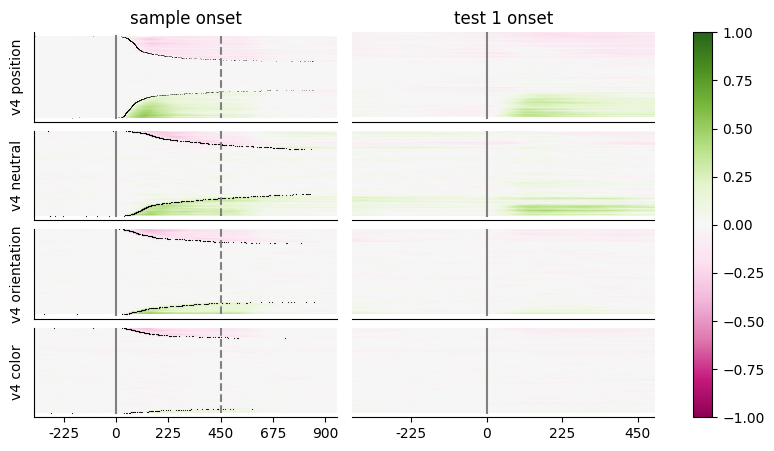

In [284]:
v4_neutral_sample_value    =   v4[0][1]
v4_neutral_test_value      =   v4[2][1]

v4_orient_sample_value     =   v4[0][3]
v4_orient_test_value       =   v4[2][3]

v4_color_sample_value      =   v4[0][5]
v4_color_test_value        =   v4[2][5]

v4_position_sample_value   =   v4[0][7]
v4_position_test_value     =   v4[2][7]

lat_v4_neutral     =   v4[4][1]
lat_v4_orient      =   v4[4][3]
lat_v4_color       =   v4[4][5]
lat_v4_position    =   v4[4][7]

lat_v4_position[lat_v4_position>1200]=np.nan
lat_v4_neutral[lat_v4_neutral>1200]=np.nan
lat_v4_orient[lat_v4_orient>1200]=np.nan
lat_v4_color[lat_v4_color>1200]=np.nan

sort_sneutral    =   sortrocvaluesbylatencies(v4_neutral_sample_value[:,450:900],lat_v4_neutral)
sort_sorient     =   sortrocvaluesbylatencies(v4_orient_sample_value[:,450:900],lat_v4_orient)
sort_scolor      =   sortrocvaluesbylatencies(v4_color_sample_value[:,450:900],lat_v4_color)
sort_sposition   =   sortrocvaluesbylatencies(v4_position_sample_value[:,450:900],lat_v4_position)

sort_tneutral    =   np.argsort(np.mean(v4_neutral_test_value[:,450:900], axis=1))
sort_torient     =   np.argsort(np.mean(v4_orient_test_value[:,450:900], axis=1))
sort_tcolor      =   np.argsort(np.mean(v4_color_test_value[:,450:900], axis=1))
sort_tposition   =   np.argsort(np.mean(v4_position_test_value[:,450:900], axis=1))

sort_neutral    =   sort_sneutral
sort_orient     =   sort_sorient
sort_color      =   sort_scolor
sort_position   =   sort_sposition


# fig     =   plt.figure(figsize=(10,10))
fig, ax      =   plt.subplots(4,2,figsize=(10,5))

# im0       =   sns.heatmap(v4_position_sample_value[sort_position,:1300], vmin=-1, vmax=1, cmap='PiYG', ax=ax[0,0])#
im0       =   ax[0,0].imshow(v4_position_sample_value[sort_position,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto', interpolation='bilinear')
im1       =   ax[0,1].imshow(v4_position_test_value[sort_position,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im2       =   ax[1,0].imshow(v4_neutral_sample_value[sort_neutral,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im3       =   ax[1,1].imshow(v4_neutral_test_value[sort_neutral,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im4       =   ax[2,0].imshow(v4_orient_sample_value[sort_orient,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im5       =   ax[2,1].imshow(v4_orient_test_value[sort_orient,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

im6       =   ax[3,0].imshow(v4_color_sample_value[sort_color,:1300], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')
im7       =   ax[3,1].imshow(v4_color_test_value[sort_color,:900], vmin=-1, vmax=1, cmap='PiYG', aspect='auto')

ax[0,0].scatter(lat_v4_position[sort_position], np.arange(lat_v4_position.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,0].scatter(lat_v4_neutral[sort_neutral], np.arange(lat_v4_neutral.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.5)
ax[2,0].scatter(lat_v4_orient[sort_orient], np.arange(lat_v4_orient.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=.5)
ax[3,0].scatter(lat_v4_color[sort_color], np.arange(lat_v4_color.shape[0])-0.5, marker ='o', color=[0, 0, 0], linewidths=0.1,s=.5)

# ax[0,0].plot([lat_v4_position[sort_position], lat_v4_position[sort_position]], [np.arange(lat_v4_position.shape[0])-.5, np.arange(lat_v4_position.shape[0])+0.5], color=[0, 0, 0], linewidth=1)
# # ax[1,0].plot([lat_v4_neutral[sort_neutral], lat_v4_neutral[sort_neutral]], [np.arange(lat_v4_neutral.shape[0])-.5, np.arange(lat_v4_neutral.shape[0])+.5], color=[0, 0, 0], linewidth=1)
# ax[2,0].plot([lat_v4_orient[sort_orient], lat_v4_orient[sort_orient]], [np.arange(lat_v4_orient.shape[0])-.5, np.arange(lat_v4_orient.shape[0])+.5], color=[0, 0, 0], linewidth=1)
# ax[3,0].plot([lat_v4_color[sort_color], lat_v4_color[sort_color]], [np.arange(lat_v4_color.shape[0])-.5, np.arange(lat_v4_color.shape[0])+.5], color=[0, 0, 0], linewidth=1)

ax[0,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[1,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[2,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))
ax[3,0].plot([350,350],[0, sort_neutral.shape[0]],color=(0.5, .5, .5))

ax[0,0].plot([350+450,350+450],[-1, sort_neutral.shape[0]+2],color=(0.5, .5, .5),linestyle='dashed')
ax[1,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5),linestyle='dashed')
ax[2,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5), linestyle='dashed')
ax[3,0].plot([350+450,350+450],[0, sort_neutral.shape[0]],color=(0.5, .5, .5), linestyle='dashed')

ax[0,1].plot([400,400],[2, sort_neutral.shape[0]+2],color=(0.5, .5, .5))
ax[1,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))
ax[2,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))
ax[3,1].plot([400,400],[0, sort_neutral.shape[0]+1],color=(0.5, .5, .5))

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_title('sample onset')
ax[0,0].set_ylabel('v4 position')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_title('test 1 onset')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[1,0].set_ylabel('v4 neutral')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['left'].set_visible(False)

ax[2,0].set_xticks([])
ax[2,0].set_yticks([])
ax[2,0].set_ylabel('v4 orientation')
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)

ax[2,1].set_xticks([])
ax[2,1].set_yticks([])
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].spines['left'].set_visible(False)

ax[3,0].set_xticks([350+225*(-1), 350+225*(0), 350+225*(1), 350+225*(2), 350+225*(3), 350+225*(4)])
ax[3,0].set_xticklabels(['-225', '0', '225', '450', '675', '900'])
ax[3,0].set_yticks([])
ax[3,0].set_ylabel('v4 color')
ax[3,0].spines['top'].set_visible(False)
ax[3,0].spines['right'].set_visible(False)

ax[3,1].set_xticks([400+225*(-1), 400+225*(0), 400+225*(1), 400+225*(2)])
ax[3,1].set_xticklabels(['-225', '0', '225', '450'])
ax[3,1].set_yticks([])
ax[3,1].spines['top'].set_visible(False)
ax[3,1].spines['right'].set_visible(False)
ax[3,1].spines['left'].set_visible(False)

fig.subplots_adjust(wspace=0.05, hspace=0.1)
fig.colorbar(im2, ax=ax)

plt.savefig('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/figures/ROC_v4.pdf')  

In [7]:
Num_lip_cells   =   lip[0][1].shape[0]
Num_pfc_cells   =   pfc[0][1].shape[0]
Num_v4_cells    =   v4[0][1].shape[0]

lat_rand_v4_position    =   np.empty((1000,Num_lip_cells,))*np.nan
lat_rand_pfc_position   =   np.empty((1000,Num_lip_cells,))*np.nan

lat_rand_v4_neutral     =   np.empty((1000,Num_lip_cells,))*np.nan
lat_rand_pfc_neutral    =   np.empty((1000,Num_lip_cells,))*np.nan

lat_rand_v4_orient      =   np.empty((1000,Num_lip_cells,))*np.nan
lat_rand_pfc_orient     =   np.empty((1000,Num_lip_cells,))*np.nan

lat_rand_v4_color       =   np.empty((1000,Num_lip_cells,))*np.nan
lat_rand_pfc_color      =   np.empty((1000,Num_lip_cells,))*np.nan

for j in range(1000):
    select_pfc_cells    =    np.random.choice(Num_pfc_cells, Num_lip_cells, replace=False)
    select_v4_cells     =    np.random.choice(Num_v4_cells, Num_lip_cells, replace=False)

    lat_rand_pfc_position[j,:]  =   lat_pfc_position[select_pfc_cells]
    lat_rand_v4_position[j,:]   =   lat_v4_position[select_v4_cells]

    lat_rand_pfc_neutral[j,:]  =   lat_pfc_neutral[select_pfc_cells]
    lat_rand_v4_neutral[j,:]   =   lat_v4_neutral[select_v4_cells]
    
    lat_rand_pfc_orient[j,:]  =   lat_pfc_orient[select_pfc_cells]
    lat_rand_v4_orient[j,:]   =   lat_v4_orient[select_v4_cells]
    
    lat_rand_pfc_color[j,:]  =   lat_pfc_color[select_pfc_cells]
    lat_rand_v4_color[j,:]   =   lat_v4_color[select_v4_cells]


    

In [14]:
lat_diff_lip_v4_position    =   np.reshape(mt.repmat(lat_rand_v4_position[0],lat_rand_v4_position[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_position,lat_lip_position.shape[0],1)), [1, lat_lip_position.shape[0]*lat_lip_position.shape[0]])
lat_diff_lip_pfc_position   =   np.reshape(mt.repmat(lat_rand_pfc_position[0],lat_rand_pfc_position[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_position,lat_lip_position.shape[0],1)), [1, lat_lip_position.shape[0]*lat_lip_position.shape[0]])
lat_diff_lip_v4_position    =   lat_diff_lip_v4_position[lat_diff_lip_v4_position>-3000]
lat_diff_lip_pfc_position   =   lat_diff_lip_pfc_position[lat_diff_lip_pfc_position>-3000]

lat_diff_lip_v4_neutral    =   np.reshape(mt.repmat(lat_rand_v4_neutral[0],lat_rand_v4_neutral[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_neutral,lat_lip_neutral.shape[0],1)), [1, lat_lip_neutral.shape[0]*lat_lip_neutral.shape[0]])
lat_diff_lip_pfc_neutral   =   np.reshape(mt.repmat(lat_rand_pfc_neutral[0],lat_rand_pfc_neutral[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_neutral,lat_lip_neutral.shape[0],1)), [1, lat_lip_neutral.shape[0]*lat_lip_neutral.shape[0]])
lat_diff_lip_v4_neutral    =   lat_diff_lip_v4_neutral[lat_diff_lip_v4_neutral>-3000]
lat_diff_lip_pfc_neutral   =   lat_diff_lip_pfc_neutral[lat_diff_lip_pfc_neutral>-3000]

lat_diff_lip_v4_orient    =   np.reshape(mt.repmat(lat_rand_v4_orient[0],lat_rand_v4_orient[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_orient,lat_lip_orient.shape[0],1)), [1, lat_lip_orient.shape[0]*lat_lip_orient.shape[0]])
lat_diff_lip_pfc_orient   =   np.reshape(mt.repmat(lat_rand_pfc_orient[0],lat_rand_pfc_orient[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_orient,lat_lip_orient.shape[0],1)), [1, lat_lip_orient.shape[0]*lat_lip_orient.shape[0]])
lat_diff_lip_v4_orient    =   lat_diff_lip_v4_orient[lat_diff_lip_v4_orient>-3000]
lat_diff_lip_pfc_orient   =   lat_diff_lip_pfc_orient[lat_diff_lip_pfc_orient>-3000]

lat_diff_lip_v4_color    =   np.reshape(mt.repmat(lat_rand_v4_color[0],lat_rand_v4_color[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_color,lat_lip_color.shape[0],1)), [1, lat_lip_color.shape[0]*lat_lip_color.shape[0]])
lat_diff_lip_pfc_color   =   np.reshape(mt.repmat(lat_rand_pfc_color[0],lat_rand_pfc_color[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_color,lat_lip_color.shape[0],1)), [1, lat_lip_color.shape[0]*lat_lip_color.shape[0]])   
lat_diff_lip_v4_color    =   lat_diff_lip_v4_color[lat_diff_lip_v4_color>-3000]
lat_diff_lip_pfc_color   =   lat_diff_lip_pfc_color[lat_diff_lip_pfc_color>-3000]


In [16]:
lat_diff_lip_v4_color.shape

(900,)

In [57]:
mt.repmat(lat_rand_v4_position[0],lat_rand_v4_position[0].shape[0],1)-np.transpose(mt.repmat(lat_lip_position,lat_lip_position.shape[0],1).shape)

ValueError: operands could not be broadcast together with shapes (215,215) (2,) 

In [54]:
lat_rand_v4_color[0]

array([566.,  nan,  nan, 531.,  nan,  nan,  nan,  nan, 469.,  nan,  nan,
        nan, 504.,  nan,  nan,  nan,  72.,  nan, 802.,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan, 820.,  nan, 553.,  nan,
        nan,  nan, 490.,  nan,  nan,  nan,  nan,  nan, 646.,  nan, 705.,
        nan,  nan,  nan,  nan, 608.,  nan, 455.,  nan,  nan, 383.,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 415., 378.,  nan,
        nan,  nan,  nan, 584.,  nan,  nan,  nan, 429.,  nan,  nan, 628.,
        nan,  nan,  nan, 721.,  nan,  nan,  nan,  nan,  nan,  nan, 501.,
       415.,  nan, 506.,  nan,  nan, 576.,  nan,  nan, 444.,  nan, 619.,
        nan,  nan,  nan, 424.,  nan,  nan,  nan,  nan, 424.,  nan,  nan,
        nan,  nan,  nan,  nan, 465., 573.,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan, 394.,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan, 407.,  nan,  nan, 742.,  nan, 674.,
       438., 783.,  nan,  nan,  nan,  nan,  nan,  n

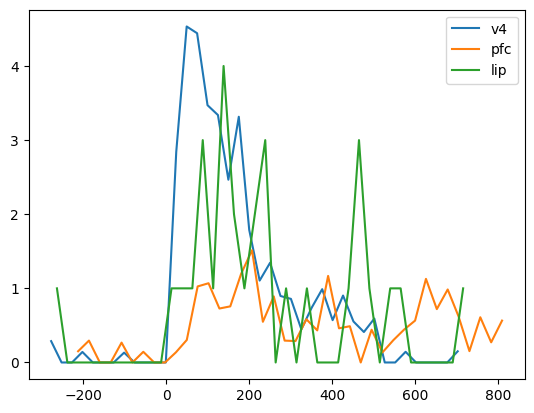

In [42]:
av4,bv4=np.histogram(lat_rand_v4_color[lat_rand_v4_color>0], bins=40)
apfc,bpfc=np.histogram(lat_rand_pfc_color[lat_rand_pfc_color>0], bins=40)
alip,blip=np.histogram(lat_lip_color[lat_lip_color>0], bins=40)

plt.plot(bv4[:-1]-350,av4/1000, label="v4") 
plt.plot(bpfc[:-1]-350,apfc/1000, label="pfc") 
plt.plot(blip[:-1]-350,alip, label="lip") 
plt.legend()

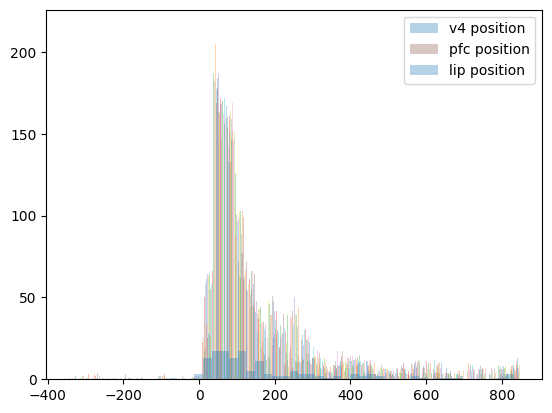

In [10]:
plt.hist(lat_rand_v4_position-350, bins=40,label="v4 position", alpha=0.33)
plt.hist(lat_rand_pfc_position-350, bins=40,label="pfc position", alpha=0.33)
plt.hist(lat_lip_position-350, bins=40,label="lip position", alpha=0.33)
plt.legend()

TypeError: Axes.hist() missing 1 required positional argument: 'x'

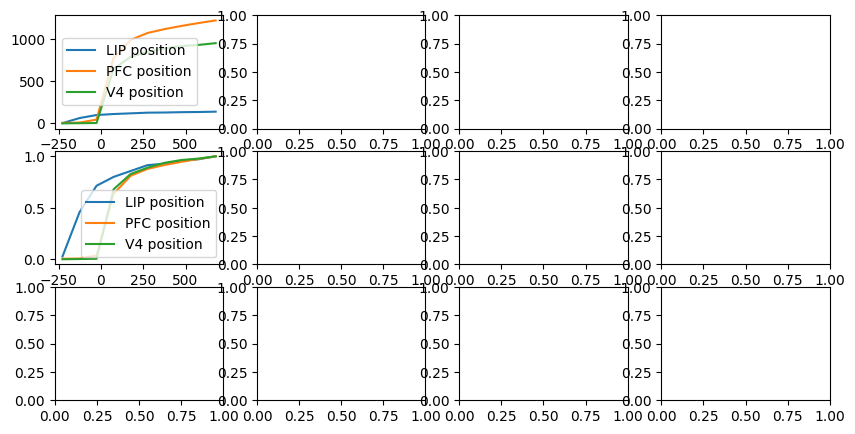

In [43]:

count_lip_position, bins_count = np.histogram(lat_lip_position[np.logical_and(lat_lip_position>0)], bins=10) 
pdf_lip_position    =   count_lip_position #/ sum(count_lip_position) 
cdf_lip_position    =   np.cumsum(pdf_lip_position) 
pdfn_lip_position   =   count_lip_position / sum(count_lip_position) 
cdfn_lip_position   =   np.cumsum(pdfn_lip_position) 


count_lip_neutral, bins_count = np.histogram(lat_lip_neutral[np.logical_and(lat_lip_neutral>0)], bins=10) 
pdf_lip_neutral = count_lip_neutral #/ sum(count_lip_neutral) 
cdf_lip_neutral = np.cumsum(pdf_lip_neutral) 
pdfn_lip_neutral = count_lip_neutral / sum(count_lip_neutral) 
cdfn_lip_neutral = np.cumsum(pdfn_lip_neutral) 

count_lip_orient, bins_count = np.histogram(lat_lip_orient[np.logical_and(lat_lip_orient>0)], bins=10) 
pdf_lip_orient = count_lip_orient #/ sum(count_lip_orient) 
cdf_lip_orient = np.cumsum(pdf_lip_orient) 
pdfn_lip_orient = count_lip_orient / sum(count_lip_orient) 
cdfn_lip_orient = np.cumsum(pdfn_lip_orient) 

count_lip_color, bins_count = np.histogram(lat_lip_color[np.logical_and(lat_lip_color>0)], bins=10) 
pdf_lip_color = count_lip_color #/ sum(count_lip_color) 
cdf_lip_color = np.cumsum(pdf_lip_color) 
pdfn_lip_color = count_lip_color / sum(count_lip_color) 
cdfn_lip_color = np.cumsum(pdfn_lip_color) 



count_pfc_position, bins_count = np.histogram(lat_pfc_position[np.logical_and(lat_pfc_position>0)], bins=10) 
pdf_pfc_position    =   count_pfc_position #/ sum(count_pfc_position) 
cdf_pfc_position    =   np.cumsum(pdf_pfc_position) 
pdfn_pfc_position   =   count_pfc_position / sum(count_pfc_position) 
cdfn_pfc_position   =   np.cumsum(pdfn_pfc_position) 

count_pfc_neutral, bins_count = np.histogram(lat_pfc_neutral[np.logical_and(lat_pfc_neutral>0)], bins=10) 
pdf_pfc_neutral = count_pfc_neutral #/ sum(count_pfc_neutral) 
cdf_pfc_neutral = np.cumsum(pdf_pfc_neutral) 
pdfn_pfc_neutral= count_pfc_neutral / sum(count_pfc_neutral) 
cdfn_pfc_neutral= np.cumsum(pdfn_pfc_neutral) 

count_pfc_orient, bins_count = np.histogram(lat_pfc_orient[np.logical_and(lat_pfc_orient>0)], bins=10) 
pdf_pfc_orient = count_pfc_orient #/ sum(count_pfc_orient) 
cdf_pfc_orient = np.cumsum(pdf_pfc_orient) 
pdfn_pfc_orient= count_pfc_orient / sum(count_pfc_orient) 
cdfn_pfc_orient= np.cumsum(pdfn_pfc_orient) 

count_pfc_color, bins_count = np.histogram(lat_pfc_color[np.logical_and(lat_pfc_color>0)], bins=10) 
pdf_pfc_color = count_pfc_color #/ sum(count_pfc_color) 
cdf_pfc_color = np.cumsum(pdf_pfc_color) 
pdfn_pfc_color = count_pfc_color / sum(count_pfc_color) 
cdfn_pfc_color= np.cumsum(pdfn_pfc_color) 

count_v4_position, bins_count = np.histogram(lat_v4_position[np.logical_and(lat_v4_position>0)], bins=10) 
pdf_v4_position    =   count_v4_position #/ sum(count_v4_position) 
cdf_v4_position    =   np.cumsum(pdf_v4_position) 
pdfn_v4_position   =   count_v4_position / sum(count_v4_position) 
cdfn_v4_position   =   np.cumsum(pdfn_v4_position) 

count_v4_neutral, bins_count = np.histogram(lat_v4_neutral[np.logical_and(lat_v4_neutral>0)], bins=10) 
pdf_v4_neutral = count_v4_neutral #/ sum(count_v4_neutral) 
cdf_v4_neutral = np.cumsum(pdf_v4_neutral) 
pdfn_v4_neutral = count_v4_neutral / sum(count_v4_neutral) 
cdfn_v4_neutral = np.cumsum(pdfn_v4_neutral) 

count_v4_orient, bins_count = np.histogram(lat_v4_orient[np.logical_and(lat_v4_orient>0)], bins=10) 
pdf_v4_orient = count_v4_orient #/ sum(count_v4_orient) 
cdf_v4_orient = np.cumsum(pdf_v4_orient) 
pdfn_v4_orient = count_v4_orient / sum(count_v4_orient) 
cdfn_v4_orient = np.cumsum(pdfn_v4_orient) 

count_v4_color, bins_count = np.histogram(lat_v4_color[np.logical_and(lat_v4_color>0)], bins=10) 
pdf_v4_color = count_v4_color #/ sum(count_v4_color) 
cdf_v4_color = np.cumsum(pdf_v4_color) 
pdfn_v4_color = count_v4_color / sum(count_v4_color) 
cdfn_v4_color = np.cumsum(pdfn_v4_color) 

fig, ax      =   plt.subplots(3,4,figsize=(10,5))

ax[0,0].plot(bins_count[1:]-400, cdf_lip_position, label="LIP position") 
ax[0,0].plot(bins_count[1:]-400, cdf_pfc_position, label="PFC position") 
ax[0,0].plot(bins_count[1:]-400, cdf_v4_position, label="V4 position") 
ax[0,0].legend()  

ax[1,0].plot(bins_count[1:]-400, cdfn_lip_position, label="LIP position") 
ax[1,0].plot(bins_count[1:]-400, cdfn_pfc_position, label="PFC position") 
ax[1,0].plot(bins_count[1:]-400, cdfn_v4_position, label="V4 position") 
ax[1,0].legend()    

ax[2,0].hist()

ax[0,1].plot(bins_count[1:]-400, cdf_lip_neutral, label="LIP neutral") 
ax[0,1].plot(bins_count[1:]-400, cdf_pfc_neutral, label="PFC neutral") 
ax[0,1].plot(bins_count[1:]-400, cdf_v4_neutral, label="V4 neutral") 
ax[0,1].legend()    


ax[1,1].plot(bins_count[1:]-400, cdfn_lip_neutral, label="LIP neutral") 
ax[1,1].plot(bins_count[1:]-400, cdfn_pfc_neutral, label="PFC neutral") 
ax[1,1].plot(bins_count[1:]-400, cdfn_v4_neutral, label="V4 neutral") 
ax[1,1].legend()    

# ax[1,0].boxplot([lat_lip_neutral[np.logical_and(lat_lip_neutral>0, lat_lip_neutral< 1200)]-400, 
#                 lat_pfc_neutral[np.logical_and(lat_pfc_neutral>0, lat_pfc_neutral< 1200)]-400,
#                 lat_v4_neutral[np.logical_and(lat_v4_neutral>0, lat_v4_neutral< 1200)]-400])



ax[0,2].plot(bins_count[1:]-400, cdf_lip_orient, label="lip orient") 
ax[0,2].plot(bins_count[1:]-400, cdf_pfc_orient, label="pfc orient") 
ax[0,2].plot(bins_count[1:]-400, cdf_v4_orient, label="V4 orient") 
ax[0,2].legend()    

ax[1,2].plot(bins_count[1:]-400, cdfn_lip_orient, label="lip orient") 
ax[1,2].plot(bins_count[1:]-400, cdfn_pfc_orient, label="pfc orient") 
ax[1,2].plot(bins_count[1:]-400, cdfn_v4_orient, label="V4 orient") 
ax[1,2].legend()    


# ax[1,1].boxplot([lat_lip_orient[np.logical_and(lat_lip_orient>0, lat_lip_orient< 1200)]-400,
#                 lat_pfc_orient[np.logical_and(lat_pfc_orient>0, lat_pfc_orient< 1200)]-400,
#                 lat_v4_orient[np.logical_and(lat_v4_orient>0, lat_v4_orient< 1200)]-400])


ax[0,3].plot(bins_count[1:]-400, cdf_lip_color, label="lip color") 
ax[0,3].plot(bins_count[1:]-400, cdf_pfc_color, label="pfc color") 
ax[0,3].plot(bins_count[1:]-400, cdf_v4_color, label="v4 color") 
ax[0,3].legend() 


ax[1,3].plot(bins_count[1:]-400, cdfn_lip_color, label="lip color") 
ax[1,3].plot(bins_count[1:]-400, cdfn_pfc_color, label="pfc color") 
ax[1,3].plot(bins_count[1:]-400, cdfn_v4_color, label="v4 color") 
ax[1,3].legend() 

# ax[1,2].boxplot([lat_lip_color[np.logical_and(lat_lip_color>0, lat_lip_color< 1200)]-400,
#                 lat_pfc_color[np.logical_and(lat_pfc_color>0, lat_pfc_color< 1200)]-400,
#                 lat_v4_color[np.logical_and(lat_v4_color>0, lat_v4_color< 1200)]-400])

In [ ]:
fig, ax      =   plt.subplots(2,3,figsize=(10,5))
count_lip_neutral, bins_count = np.histogram(lat_lip_neutral[np.logical_and(lat_lip_neutral>0, lat_lip_neutral< 1200)], bins=10) 
pdf_lip_neutral = count_lip_neutral #/ sum(count_lip_neutral) 
cdf_lip_neutral = np.cumsum(pdf_lip_neutral) 
pdfn_lip_neutral = count_lip_neutral / sum(count_lip_neutral) 
cdfn_lip_neutral = np.cumsum(pdfn_lip_neutral) 

count_lip_orient, bins_count = np.histogram(lat_lip_orient[np.logical_and(lat_lip_orient>0, lat_lip_orient< 1200)], bins=10) 
pdf_lip_orient = count_lip_orient #/ sum(count_lip_orient) 
cdf_lip_orient = np.cumsum(pdf_lip_orient) 
pdfn_lip_orient = count_lip_orient / sum(count_lip_orient) 
cdfn_lip_orient = np.cumsum(pdfn_lip_orient) 

count_lip_color, bins_count = np.histogram(lat_lip_color[np.logical_and(lat_lip_color>0, lat_lip_color< 1200)], bins=10) 
pdf_lip_color = count_lip_color #/ sum(count_lip_color) 
cdf_lip_color = np.cumsum(pdf_lip_color) 
pdfn_lip_color = count_lip_color / sum(count_lip_color) 
cdfn_lip_color = np.cumsum(pdfn_lip_color) 


count_pfc_neutral, bins_count = np.histogram(lat_pfc_neutral[np.logical_and(lat_pfc_neutral>0, lat_pfc_neutral< 1200)], bins=10) 
pdf_pfc_neutral = count_pfc_neutral #/ sum(count_pfc_neutral) 
cdf_pfc_neutral = np.cumsum(pdf_pfc_neutral) 
pdfn_pfc_neutral= count_pfc_neutral / sum(count_pfc_neutral) 
cdfn_pfc_neutral= np.cumsum(pdfn_pfc_neutral) 

count_pfc_orient, bins_count = np.histogram(lat_pfc_orient[np.logical_and(lat_pfc_orient>0, lat_pfc_orient< 1200)], bins=10) 
pdf_pfc_orient = count_pfc_orient #/ sum(count_pfc_orient) 
cdf_pfc_orient = np.cumsum(pdf_pfc_orient) 
pdfn_pfc_orient= count_pfc_orient / sum(count_pfc_orient) 
cdfn_pfc_orient= np.cumsum(pdfn_pfc_orient) 

count_pfc_color, bins_count = np.histogram(lat_pfc_color[np.logical_and(lat_pfc_color>0, lat_pfc_color< 1200)], bins=10) 
pdf_pfc_color = count_pfc_color #/ sum(count_pfc_color) 
cdf_pfc_color = np.cumsum(pdf_pfc_color) 
pdfn_pfc_color = count_pfc_color / sum(count_pfc_color) 
cdfn_pfc_color= np.cumsum(pdfn_pfc_color) 

count_v4_neutral, bins_count = np.histogram(lat_v4_neutral[np.logical_and(lat_v4_neutral>0, lat_v4_neutral< 1200)], bins=10) 
pdf_v4_neutral = count_v4_neutral #/ sum(count_v4_neutral) 
cdf_v4_neutral = np.cumsum(pdf_v4_neutral) 
pdfn_v4_neutral = count_v4_neutral / sum(count_v4_neutral) 
cdfn_v4_neutral = np.cumsum(pdfn_v4_neutral) 

count_v4_orient, bins_count = np.histogram(lat_v4_orient[np.logical_and(lat_v4_orient>0, lat_v4_orient< 1200)], bins=10) 
pdf_v4_orient = count_v4_orient #/ sum(count_v4_orient) 
cdf_v4_orient = np.cumsum(pdf_v4_orient) 
pdfn_v4_orient = count_v4_orient / sum(count_v4_orient) 
cdfn_v4_orient = np.cumsum(pdfn_v4_orient) 

count_v4_color, bins_count = np.histogram(lat_v4_color[np.logical_and(lat_v4_color>0, lat_v4_color< 1200)], bins=10) 
pdf_v4_color = count_v4_color #/ sum(count_v4_color) 
cdf_v4_color = np.cumsum(pdf_v4_color) 
pdfn_v4_color = count_v4_color / sum(count_v4_color) 
cdfn_v4_color = np.cumsum(pdfn_v4_color) 

ax[0,0].plot(bins_count[1:]-400, cdf_lip_neutral, label="LIP neutral") 
ax[0,0].plot(bins_count[1:]-400, cdf_pfc_neutral, label="PFC neutral") 
ax[0,0].plot(bins_count[1:]-400, cdf_v4_neutral, label="V4 neutral") 
ax[0,0].legend()    


ax[1,0].plot(bins_count[1:]-400, cdfn_lip_neutral, label="LIP neutral") 
ax[1,0].plot(bins_count[1:]-400, cdfn_pfc_neutral, label="PFC neutral") 
ax[1,0].plot(bins_count[1:]-400, cdfn_v4_neutral, label="V4 neutral") 
ax[1,0].legend()    

# ax[1,0].boxplot([lat_lip_neutral[np.logical_and(lat_lip_neutral>0, lat_lip_neutral< 1200)]-400, 
#                 lat_pfc_neutral[np.logical_and(lat_pfc_neutral>0, lat_pfc_neutral< 1200)]-400,
#                 lat_v4_neutral[np.logical_and(lat_v4_neutral>0, lat_v4_neutral< 1200)]-400])



ax[0,1].plot(bins_count[1:]-400, cdf_lip_orient, label="lip orient") 
ax[0,1].plot(bins_count[1:]-400, cdf_pfc_orient, label="pfc orient") 
ax[0,1].plot(bins_count[1:]-400, cdf_v4_orient, label="V4 orient") 
ax[0,1].legend()    

ax[1,1].plot(bins_count[1:]-400, cdfn_lip_orient, label="lip orient") 
ax[1,1].plot(bins_count[1:]-400, cdfn_pfc_orient, label="pfc orient") 
ax[1,1].plot(bins_count[1:]-400, cdfn_v4_orient, label="V4 orient") 
ax[1,1].legend()    


# ax[1,1].boxplot([lat_lip_orient[np.logical_and(lat_lip_orient>0, lat_lip_orient< 1200)]-400,
#                 lat_pfc_orient[np.logical_and(lat_pfc_orient>0, lat_pfc_orient< 1200)]-400,
#                 lat_v4_orient[np.logical_and(lat_v4_orient>0, lat_v4_orient< 1200)]-400])


ax[0,2].plot(bins_count[1:]-400, cdf_lip_color, label="lip color") 
ax[0,2].plot(bins_count[1:]-400, cdf_pfc_color, label="pfc color") 
ax[0,2].plot(bins_count[1:]-400, cdf_v4_color, label="v4 color") 
ax[0,2].legend() 


ax[1,2].plot(bins_count[1:]-400, cdfn_lip_color, label="lip color") 
ax[1,2].plot(bins_count[1:]-400, cdfn_pfc_color, label="pfc color") 
ax[1,2].plot(bins_count[1:]-400, cdfn_v4_color, label="v4 color") 
ax[1,2].legend() 

# ax[1,2].boxplot([lat_lip_color[np.logical_and(lat_lip_color>0, lat_lip_color< 1200)]-400,
#                 lat_pfc_color[np.logical_and(lat_pfc_color>0, lat_pfc_color< 1200)]-400,
#                 lat_v4_color[np.logical_and(lat_v4_color>0, lat_v4_color< 1200)]-400])

In [13]:
print(['lip neutral=', np.mean(lnlip)])
print(['pfc neutral=', np.mean(lnpfc)])
print(['v4 neutral=', np.mean(lnv4)])

NameError: name 'lnlip' is not defined

In [ ]:
print(['lip orient=', np.mean(lolip)])
print(['pfc orient=', np.mean(lopfc)])
print(['v4 orient=', np.mean(lov4)])

['lip orient=', 170.59615384615384]
['pfc orient=', 331.5807291666667]
['v4 orient=', 158.83039647577093]


In [ ]:
print(['lip color=', np.mean(lclip)])
print(['pfc color=', np.mean(lcpfc)])
print(['v4 color=', np.mean(lcv4)])

['lip color=', 202.83333333333334]
['pfc color=', 327.96268656716416]
['v4 color=', 126.79032258064517]


In [ ]:
lnv4=lat_v4_neutral[np.logical_and(lat_v4_neutral>0, lat_v4_neutral< 1200)]-400
lnpfc=lat_pfc_neutral[np.logical_and(lat_pfc_neutral>0, lat_pfc_neutral< 1200)]-400
lnlip=lat_lip_neutral[np.logical_and(lat_lip_neutral>0, lat_lip_neutral< 1200)]-400


lcv4=lat_v4_color[np.logical_and(lat_v4_color>0, lat_v4_color< 1200)]-400
lcpfc=lat_pfc_color[np.logical_and(lat_pfc_color>0, lat_pfc_color< 1200)]-400
lclip=lat_lip_color[np.logical_and(lat_lip_color>0, lat_lip_color< 1200)]-400


lov4=lat_v4_orient[np.logical_and(lat_v4_orient>0, lat_v4_orient< 1200)]-400
lopfc=lat_pfc_orient[np.logical_and(lat_pfc_orient>0, lat_pfc_orient< 1200)]-400
lolip=lat_lip_orient[np.logical_and(lat_lip_orient>0, lat_lip_orient< 1200)]-400
stats.ttest_ind(lolip, lopfc)

Ttest_indResult(statistic=-4.876012193716354, pvalue=1.5215406343420507e-06)

In [ ]:
# DECODING